__Multi-Class Prediction of Obesity Risk__
- 출처 : https://www.kaggle.com/competitions/playground-series-s4e2/overview (사용 데이터)
- 참고 : https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster (원본 데이터)

[개요]
- 다양한 요인을 활용해 비만 위험(obesity risk) 예측

[Columns] : 18 columns
- id
- Gender
- Age
- Height
- Weight
- family_history_with_overweight : family member suffered or suffers from overweight
- FAVC : Frequent consumption of high caloric food
- FCVC : Frequency of consumption of vegetables
- NCP : Number of main meals
- CAEC : Consumption of food between meals
- SMOKE : Smoker or not
- CH2O : Consumption of water daily
- SCC : Calories consumption monitoring
- FAF : Physical activity frequency
- TUE : Time using technology devices
- CALC : Consumption of alcohol
- MTRANS : Transportation used
- __NObeyesdad__ (target) : Obesity level deducted


[Evaluation]
- accuracy score

[Submission]
- id, NObeyesdad

# data load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("./data/Obesity Risk/train.csv")
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [6]:
train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [9]:
train.describe(include="object")

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


- 결측치 없음
- 크게 전처리 할 사항 없어 보임

In [10]:
train["NObeyesdad"].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

# EDA

In [18]:
df = train.copy()

In [36]:
# 수치형, 범주형 변수명 저장
num_list = list(df.select_dtypes("number").columns) # ['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
cat_list = list(df.select_dtypes("object").columns) # ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 
                                                    #  'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

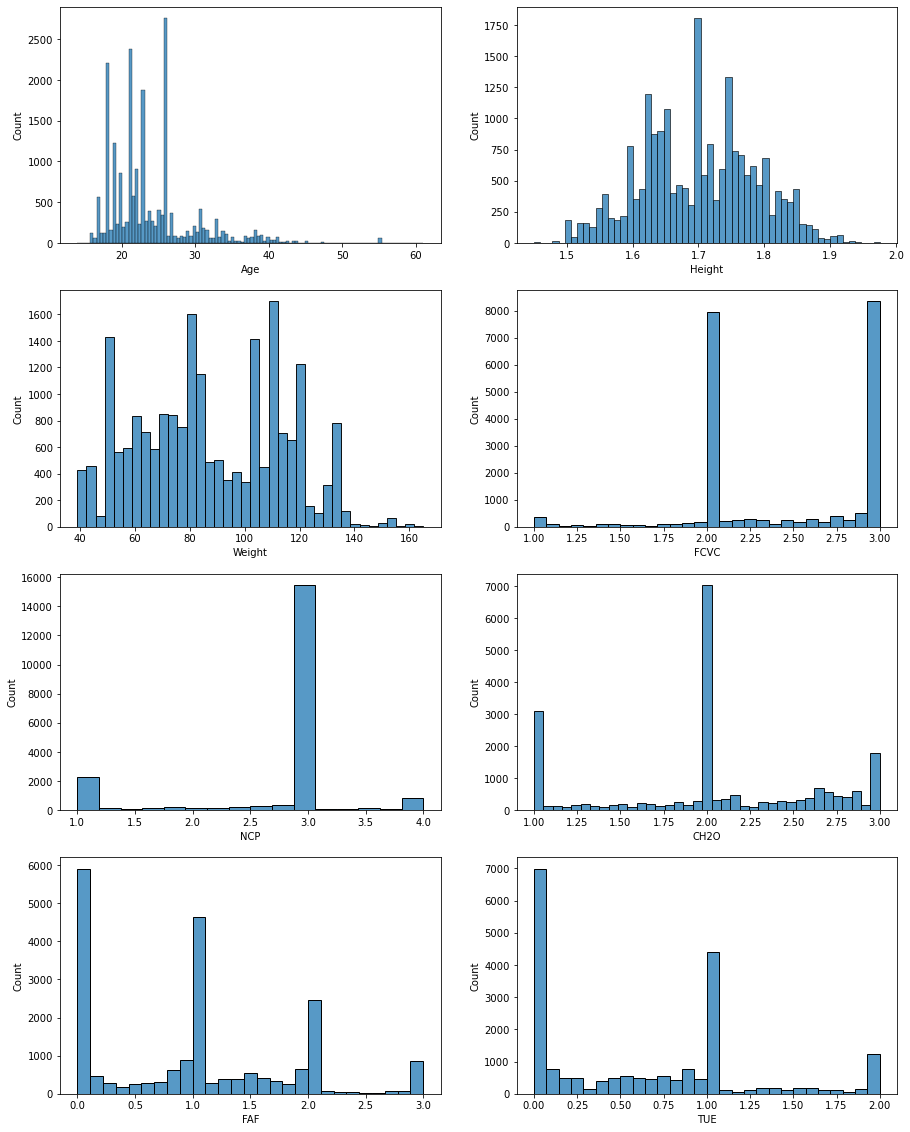

In [27]:
# 수치형 변수
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

for i, col_name in enumerate(num_list[1:]):
    sns.histplot(data=df[col_name], ax=axes[i//2, i%2])

In [85]:
# target 변수 : 순서 부여하기
# 참고 : https://suy379.tistory.com/150

from pandas.api.types import CategoricalDtype

target_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
                'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
ordered_NObe = CategoricalDtype(categories=target_order, ordered=True)

df["NObeyesdad"] = df["NObeyesdad"].astype(ordered_NObe)
df["NObeyesdad"].unique()

['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight', 'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_I']
Categories (7, object): ['Insufficient_Weight' < 'Normal_Weight' < 'Overweight_Level_I' < 'Overweight_Level_II' < 'Obesity_Type_I' < 'Obesity_Type_II' < 'Obesity_Type_III']

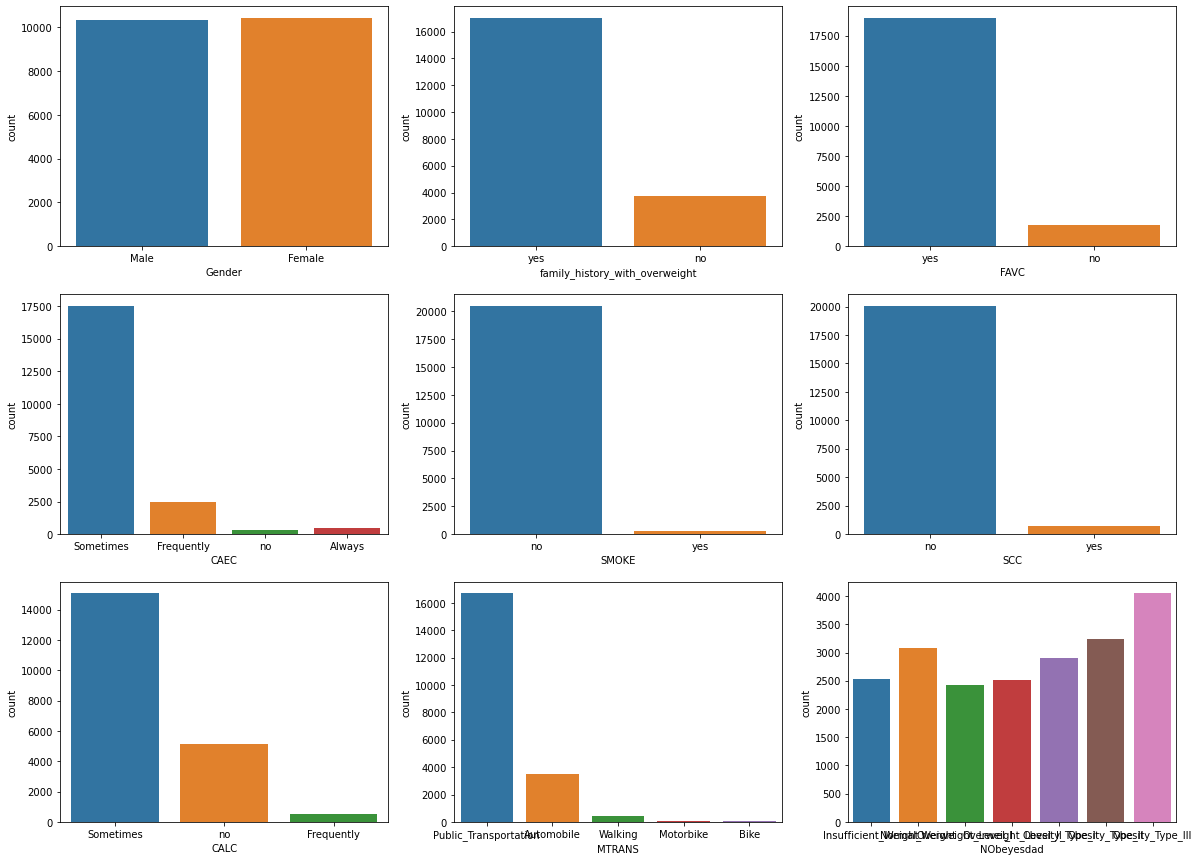

In [96]:
# 범주형 변수
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))

for i, col_name in enumerate(cat_list):
    sns.countplot(data=df, x=col_name, ax=axes[i//3, i%3])

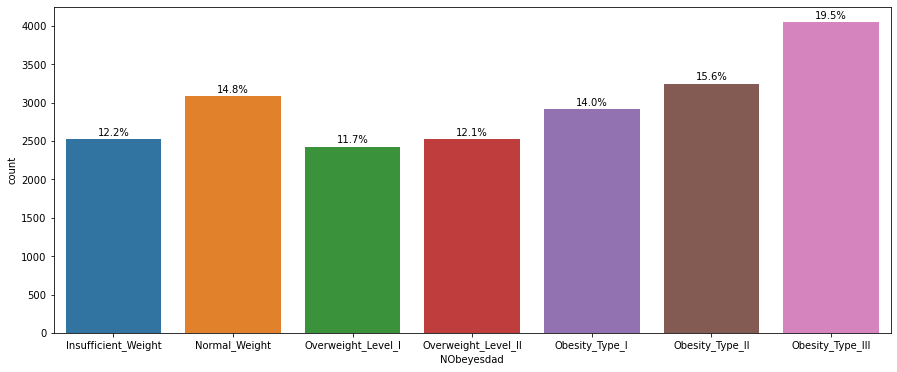

In [123]:
# target 변수 EDA

plt.figure(figsize=(15,6))
p = sns.countplot(data=df, x="NObeyesdad")

for patch in p.patches:
        p.annotate(format(patch.get_height() / df.shape[0] * 100, '.1f')+"%",
                   (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 7),
                   textcoords = 'offset points')

In [95]:
df["NObeyesdad"].value_counts(normalize=True) * 100

Obesity_Type_III       19.491280
Obesity_Type_II        15.646979
Normal_Weight          14.847288
Obesity_Type_I         14.018692
Insufficient_Weight    12.154350
Overweight_Level_II    12.149533
Overweight_Level_I     11.691878
Name: NObeyesdad, dtype: float64

# 여기부터 다시

In [132]:
# 파생변수 생성 : weight_cat



AttributeError: 'numpy.ndarray' object has no attribute 'split'